In [1]:
import torch
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from biological_fuzzy_logic_networks.DREAM_analysis.utils import create_bfz

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
with open("/dccstor/ipc1/CAR/BFN/Model/Test/BT20_EGF.json", "rb") as f:
    config = json.load(f)

ckpt = torch.load(f"/dccstor/ipc1/CAR/BFN/Model/Test/model.pt")
model = create_bfz(config["pkn_sif"], config["network_class"])
model.load_from_checkpoint(ckpt["model_state_dict"])

pred = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Test/predictions_with_model_early_stopping.csv", index_col=0)
val_data = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Test/valid_data.csv", index_col=0)
val_output_states = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Test/valid_output_states.csv", index_col=0)
val_inhibitors = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Test/valid_inhibitors.csv", index_col=0)
losses = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Test/loss.csv", index_col=0)

In [11]:
ckpt # Val loss should be 0.0244

{'epoch': 188,
 'model_state_dict': OrderedDict([('MEK12@@@MEK_and_FAK.n', tensor([0.1978])),
              ('MEK12@@@MEK_and_FAK.K', tensor([-0.7846])),
              ('FAK@@@MEK_and_FAK.n', tensor([-0.2166])),
              ('FAK@@@MEK_and_FAK.K', tensor([-8.6160]))]),
 'optimizer_state_dict': {'state': {0: {'step': 36477,
    'exp_avg': tensor([-0.0001]),
    'exp_avg_sq': tensor([1.6218e-06])},
   1: {'step': 36477,
    'exp_avg': tensor([0.0019]),
    'exp_avg_sq': tensor([6.7699e-05])},
   2: {'step': 36477,
    'exp_avg': tensor([-3.6491e-07]),
    'exp_avg_sq': tensor([4.9332e-11])},
   3: {'step': 36477,
    'exp_avg': tensor([1.0949e-06]),
    'exp_avg_sq': tensor([1.0124e-10])}},
  'param_groups': [{'lr': 0.001,
    'betas': (0.9, 0.999),
    'eps': 1e-08,
    'weight_decay': 0,
    'amsgrad': False,
    'maximize': False,
    'params': [0, 1, 2, 3]}]},
 'loss': tensor(0.0244),
 'best_val_loss': tensor(0.0244)}

In [12]:
sum(pred["ERK12"] == val_output_states["ERK12"]) == len(val_data)

True

In [8]:
pred

,ERK12
0,0.524184
1,0.558378
2,0.714762
3,0.635518
4,0.610775
...,...
19244,0.730878
19245,0.641733
19246,0.721147
19247,0.683234


In [9]:
val_output_states

,MEK12,FAK,ERK12
0,0.477804,0.481561,0.525537
1,0.508439,0.388597,0.559742
2,0.692215,0.625581,0.715996
3,0.587755,0.444329,0.636856
4,0.560467,0.562323,0.612129
...,...,...,...
19244,0.717807,0.117776,0.732081
19245,0.594938,0.457128,0.643066
19246,0.702132,0.410823,0.722370
19247,0.646942,0.554948,0.684519


/tmp/ipykernel_704847/3986053319.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  t=plt.xticks(labels=[], ticks=[])


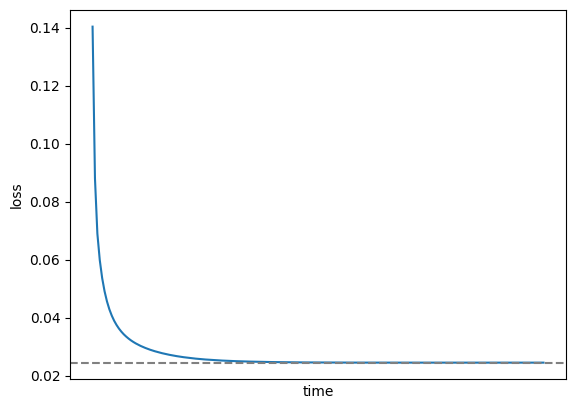

In [7]:
sns.lineplot(data=losses[losses["phase"]=="valid"], x="time", y="loss")
t=plt.xticks(labels=[], ticks=[])
plt.axhline(y=0.0244, c="grey", linestyle="--")

In [6]:
losses

,time,loss,phase
0,2024-02-28 10:08:39.723522,0.241738,train
1,2024-02-28 10:08:39.747071,0.251287,train
2,2024-02-28 10:08:39.764299,0.244218,train
3,2024-02-28 10:08:39.781083,0.249965,train
4,2024-02-28 10:08:39.796953,0.244858,train
...,...,...,...
36661,2024-02-28 10:22:37.118045,0.026252,train
36662,2024-02-28 10:22:37.138457,0.021754,train
36663,2024-02-28 10:22:37.158953,0.025281,train
36664,2024-02-28 10:22:37.178941,0.026145,train
